# Part 1 : Working with HTML and JSON

In this exercise 
a. I have created html file manually in my local machine which contains three albums from three different musicians, five songs from each album and album releasing year. 

b. I have also then created json file manually with same data in html file.

c. After creating these two files I have uploaded to my github repository. 

d. Then working in Jupyter notebook and loading these two files with python pandas library by using html reader and json reader function.

e. Then we can see the printed result as dataframe. 

f. Finally after having dataframe will compare as they are identical or not?


__Importing panda library to make the dataframe from the json and html files__


In [1]:
# import panda library to load the data
import pandas as pd

In [2]:
# Load data from HTML file into a Pandas DataFrame from github
html_df = pd.read_html("https://raw.githubusercontent.com/mamun21616/DAV5400/main/albums.html")[0]
html_df

,Album Title,Artist,Year,Tracks
0,Abbey Road,The Beatles,1969,"Come Together, Something, Maxwell's Silver Ham..."
1,Thriller,Michael Jackson,1982,"Wanna Be Startin' Somethin', Baby Be Mine, The..."
2,Back in Black,AC/DC,1980,"Hells Bells, Shoot to Thrill, What Do You Do f..."


From read_html method we have found a dataframe of album title, artist, year and tracks(songs) as column name and have 3 rows. we can try to get some column values like the following way. 

In [3]:
# view the artist name of album
html_df.Artist

0        The Beatles
1    Michael Jackson
2              AC/DC
Name: Artist, dtype: object

In [4]:
# Show the songs from Tracks column
html_df.Tracks

0    Come Together, Something, Maxwell's Silver Ham...
1    Wanna Be Startin' Somethin', Baby Be Mine, The...
2    Hells Bells, Shoot to Thrill, What Do You Do f...
Name: Tracks, dtype: object

In [5]:
# Load data from JSON file into a Pandas DataFrame from github
json_df = pd.read_json("https://raw.githubusercontent.com/mamun21616/DAV5400/main/albums.json")
json_df

,albums
0,"{'Album Title': 'Abbey Road', 'Artist': 'The B..."
1,"{'Album Title': 'Thriller', 'Artist': 'Michael..."
2,"{'Album Title': 'Back in Black', 'Artist': 'AC..."


After loading albums.json file with pd.read_json method, a dataframe is created where only one column name albums and 3 rows. These rows are in dictionary format where specifies album title, artist, year, songs. We can get the key value from the albums column.

In [6]:
# Extract 'Album Title' from the dictionaries in the 'albums' column
json_df['albums'].apply(lambda x: x['Album Title'])

0       Abbey Road
1         Thriller
2    Back in Black
Name: albums, dtype: object

In [7]:
# Extract 'songs' from the dictionaries in the 'albums' column
json_df['albums'].apply(lambda x: x['Tracks'])

0    [Come Together, Something, Maxwell's Silver Ha...
1    [Wanna Be Startin' Somethin', Baby Be Mine, Th...
2    [Hells Bells, Shoot to Thrill, What Do You Do ...
Name: albums, dtype: object

__Checking the two dataframes are identical or not using equals method__

In [8]:
# Check if the two DataFrames are identical
identical = html_df.equals(json_df)
print("Are the two DataFrames identical?", identical)

Are the two DataFrames identical? False


NO, the dataframes are not identical, they are different in structure.

# Part 2 : Scraping the Katz School’s “Staff” Web Page

To complete this web scraping part have to follow some steps. I have followed here multiple steps.
- Collected the data from the [website](https://www.yu.edu/katz/staff)
- Used beautiful soup library to parse the web data to make dataframe about katz staff which containing columns like name, title, phone, email and ofiice of staffs.


To continue for web scraping project some basic library needed. Some of them are installed here.
Those are regular expression as re, request library for web url, beautiful soup for parsing web data.

In [9]:
# Import necessary libraries for web data scrape
import re
import requests
from bs4 import BeautifulSoup

In [10]:
# Web page url for katz staff
url = "https://www.yu.edu/katz/staff"
# Fetching the url by request.get method to load the data in a varibale name response. 
response = requests.get(url)

In [11]:
# # Check if the request was successful (status code 200)
response.status_code

200

In [12]:
# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(response.content,'html.parser')

In [13]:
# Find the div with class "text-only"
staff = soup.find_all('div',class_='text-only')

In [14]:
staff

[<div class="text-only">
 <div class="field field--name-field-paragraph-body"><h3>Office of the Dean </h3>
 <p>Paul Russo, Vice Provost and Dean <br/>
 Professor of Data Science<br/><a href="/faculty/pages/russo-paul">Read Dr. Russo's Biography</a> </p>
 <p>Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean <br/><a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
  <br/>
 Sofia Binioris, Director of Communications and Strategic Initiatives<br/><a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a> | 645-592-4719</p>
 <p>Jackie Hamilton, Executive Director of Enrollment Management and Partnerships<br/><a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>
 <p>Pamela Rodman, Director of Finance and Administration<br/><a href="mailto:pamela.rodman@yu.edu">pamela.rodman@yu.edu</a> I 646.592.4777</p>
 <p>Tabitha Collazo, Business and Operations Coordinator<br/><a href="mailto:tabitha.collazo@yu.edu">t

Within staff variable I have found all text data for staffs. Now look at the text for all paragraph in array format.

In [15]:
# Extract all paragrapgh from text into staff_arr variable
staff_arr = staff[0].find_all('p')
staff_arr

[<p>Paul Russo, Vice Provost and Dean <br/>
 Professor of Data Science<br/><a href="/faculty/pages/russo-paul">Read Dr. Russo's Biography</a> </p>,
 <p>Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean <br/><a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
  <br/>
 Sofia Binioris, Director of Communications and Strategic Initiatives<br/><a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a> | 645-592-4719</p>,
 <p>Jackie Hamilton, Executive Director of Enrollment Management and Partnerships<br/><a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>,
 <p>Pamela Rodman, Director of Finance and Administration<br/><a href="mailto:pamela.rodman@yu.edu">pamela.rodman@yu.edu</a> I 646.592.4777</p>,
 <p>Tabitha Collazo, Business and Operations Coordinator<br/><a href="mailto:tabitha.collazo@yu.edu">tabitha.collazo@yu.edu</a> | 646-592-4735</p>,
 <p>Ann Leary, <span style='font-size:12.0pt;
 mso-fareas

__From the array we can easily view all the text data about staffs name, title, phone, office, email etc. Now I will extract all necessary information step by step__

## Getting the Name of staff
To get the name of the staff data I will create an empty list where will insert data, then will use for loop, regex, lambda funtion to finally get the cleaned data in a list.

In [16]:
# create an empty list 
names = []
# Using for loop and regex get the names of staff
for name in staff[0].find_all('p'):
  name = name.get_text()
  name = name.split('\xa0\n\xa0\n')
  if len(name) == 1:
    name = name[0].split(',')
    names.append(name[0])
  else:
    for n in name:
      n = n.split(',')
      names.append(n[0])

names = list(filter(lambda x: len(x) > 0 and x != '\xa0',names))


In [17]:
# see the name of staffs at katz
print("The name of staffs :", names)

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
# View the number of staffs at katz
print("The total number of staffs are :", len(names))

The name of staffs : ['Paul Russo', 'Aaron Ross', 'Sofia Binioris', 'Jackie Hamilton', 'Pamela Rodman', 'Tabitha Collazo', 'Ann Leary', 'Jared Hakimi', 'Xavier Velasquez', 'Shayna Matzner', 'Linyu Zheng', 'Hyokyeong "Kyeong" Yu', 'Rafael Reyes', 'John Vivolo', 'Nebahat Bayrakcioglu', 'Gladys Davis', 'Ariana Allias', 'Lloyd Carew-Reid', 'Denton Field']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The total number of staffs are : 19


## Getting the email of staff
To get the email of the staff data I will create an empty list where will insert data, then will use for loop, regex, lambda funtion to finally get the cleaned data in a list.

In [18]:
# Creating an empty list emails
emails = []

for email in staff[0].find_all('p'):

  for a in email.find_all('a'):
    emails.append(a.text)

emails = list(filter(lambda x: 'Schedule an Appointment' not in x,emails))
email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

emails = list(map(lambda x: x if re.match(email_pattern,x) else 'NA',emails))

__Show the mails and number of emails in the text__

In [19]:
# see the email of staffs at katz
print("The email of staffs :", emails)

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

# View the number of emails at katz
print("The total number of emails are including NA(who has not email):", len(emails))

The email of staffs : ['NA', 'aaron.ross2@yu.edu', 'sofia.binioris@yu.edu', 'jackie.hamilton@yu.edu', 'pamela.rodman@yu.edu', 'tabitha.collazo@yu.edu', 'ann.leary@yu.edu', 'jared.hakimi@yu.edu', 'xavier.velasquez@yu.edu', 'shayna.matzner@yu.edu', 'linyu.zheng@yu.edu', 'hyokyeong.yu@yu.edu', 'rafael.reyes@yu.edu', 'john.vivolo@yu.edu', 'nebahat.bayrakcioglu@yu.edu', 'gladys.davis@yu.edu', 'ariana.allias@yu.edu', 'lloyd.carew-reid@yu.edu', 'denton.field@yu.edu']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The total number of emails are including NA(who has not email): 19


## Getting the title of staff
To get the title of the staff data I will create an empty list where will insert data, then will use for loop and regex to finally get the cleaned data in a list.

In [20]:
# Create an empty list as titles
titles = []

i = 0
for title in staff[0].find_all('p'):
  title =  title.get_text()
  title = title.split('\xa0\n\xa0\n')
  if title == ['\xa0']:
    continue
  if len(title) == 1:
    titles.append(title[0].split(',')[1].split(emails[i])[0])
    i += 1
  else:
    for t in title:
      titles.append(t.split(',')[1].split(emails[i])[0])
      i += 1

__Show the titles and number of titles in the dataset__

In [21]:
# See the title of staffs at katz
print("The title of staffs :", titles)

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

# View the number of titles at katz
print("The total number of titles are :", len(titles))

The title of staffs : [" Vice Provost and Dean\xa0\nProfessor of Data ScienceRead Dr. Russo's Biography\xa0", ' Assistant Dean for Academic Programs and Deputy to the Dean\xa0', ' Director of Communications and Strategic Initiatives', ' Executive Director of Enrollment Management and Partnerships', ' Director of Finance and Administration', ' Business and Operations Coordinator', "\xa0Office Manager/Executive Assistant to the Dean's Office", ' Director', ' Associate Director of Graduate Admissions Operations', ' Assistant Director', '\xa0Assistant Director', ' International Student Advisor', ' Director of Graduate Student Life and Community Engagement', ' Executive Director of Academic Operations and Teaching and Learning', ' Academic Program Coordinator', ' Academic Program Coordinator', ' Program Manager', '\xa0Instructional Designer', ' Media Production Manager']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The total number of titles are : 19


## Getting the phone number of staff
To get the phone number of the staff data I will create an empty list where will insert data, then will use for loop and regex to finally get the cleaned data in a list.

In [22]:
# Create an empty list an phone nums
phone_nums = []

i = 0
for phones in staff[0].find_all('p'):
  phones =  phones.get_text()
  phones = phones.split('\xa0\n\xa0\n')
  phone_pattern = r'(\+\d{1,3}\s?)?(\d{3}[-\s]?\d{3}[-\s]?\d{4})'

  if phones == ['\xa0']:
    continue
  if len(phones) == 1:
    filter_phone = re.findall(phone_pattern,phones[0])
    if filter_phone:
      phone_nums.append(filter_phone[0][1])
    else:
      phone_nums.append("NA")
    # print(filter_phone)
    # break
    # titles.append(title[0].split(',')[1].split(emails[i])[0])
    i += 1
  else:
    for p in phones:
      filter_phone = re.findall(phone_pattern,p)
      if filter_phone:
        phone_nums.append(filter_phone[0][1])
      else:
        phone_nums.append("NA")
      # titles.append(t.split(',')[1].split(emails[i])[0])
      i += 1

In [23]:
# Find the phone numbers of staffs at katz
print("The phone number of staffs :", phone_nums)

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

# View the number of phones for staff use at katz
print("The total number of phones user are :", len(phone_nums))

The phone number of staffs : ['NA', '646-592-4148', '645-592-4719', '646-787-6194', 'NA', '646-592-4735', '646-592-4724', '646-592-4722', '646-592-4737', '646-592-4726', '332-271-5865', '646-592-4736', '646-592-4729', '646-592-4743', '646-592-4034', '646-592-4762', 'NA', '646-592-4768', 'NA']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The total number of phones user are : 19


## Getting the name of the offices

From the text element we have found that under h3 header we have all offices name. So first we do collect the offices data in offices variable.

In [24]:
# Find the offices from the heading elements under h3
h3_elements = staff[0].find_all('h3')
h3_elements

[<h3>Office of the Dean </h3>,
 <h3>Graduate Admissions</h3>,
 <h3>Graduate Student Life</h3>,
 <h3>Academic Operations and Teaching and Learning</h3>]

In [25]:
# Extract and store the text in the offices variable as list
offices = [h3.get_text().strip() for h3 in h3_elements]

In [26]:
# Show the list of offices
offices

['Office of the Dean',
 'Graduate Admissions',
 'Graduate Student Life',
 'Academic Operations and Teaching and Learning']

__AS we have only 4 offices and 19 employees. One office has one or more employee, so we will define them accordingly.__
__First we will create a dataframe and insert the values in that dataframe designed columns__

In [27]:
# Creating dataframe as staff_info
staff_info = pd.DataFrame({
    #"office": offices,
    "name": names,
    "title": titles,
    "email": emails,
    "phone": phone_nums
})

In [28]:
# Create a new column for the office
staff_info['office'] = ''

# Assign values to the 'office' column
staff_info.loc[:6, 'office'] = offices[0]
staff_info.loc[7:11, 'office'] = offices[1]
staff_info.loc[12, 'office'] = offices[2]
staff_info.loc[13:, 'office'] = offices[3]

In [29]:
# View the created staff information dataframe
staff_info

,name,title,email,phone,office
0,Paul Russo,Vice Provost and Dean \nProfessor of Data Sci...,NA,NA,Office of the Dean
1,Aaron Ross,Assistant Dean for Academic Programs and Depu...,aaron.ross2@yu.edu,646-592-4148,Office of the Dean
2,Sofia Binioris,Director of Communications and Strategic Init...,sofia.binioris@yu.edu,645-592-4719,Office of the Dean
3,Jackie Hamilton,Executive Director of Enrollment Management a...,jackie.hamilton@yu.edu,646-787-6194,Office of the Dean
4,Pamela Rodman,Director of Finance and Administration,pamela.rodman@yu.edu,NA,Office of the Dean
5,Tabitha Collazo,Business and Operations Coordinator,tabitha.collazo@yu.edu,646-592-4735,Office of the Dean
6,Ann Leary,Office Manager/Executive Assistant to the Dea...,ann.leary@yu.edu,646-592-4724,Office of the Dean
7,Jared Hakimi,Director,jared.hakimi@yu.edu,646-592-4722,Graduate Admissions
8,Xavier Velasquez,Associate Director of Graduate Admissions Ope...,xavier.velasquez@yu.edu,646-592-4737,Graduate Admissions
9,Shayna Matzner,Assistant Director,shayna.matzner@yu.edu,646-592-4726,Graduate Admissions


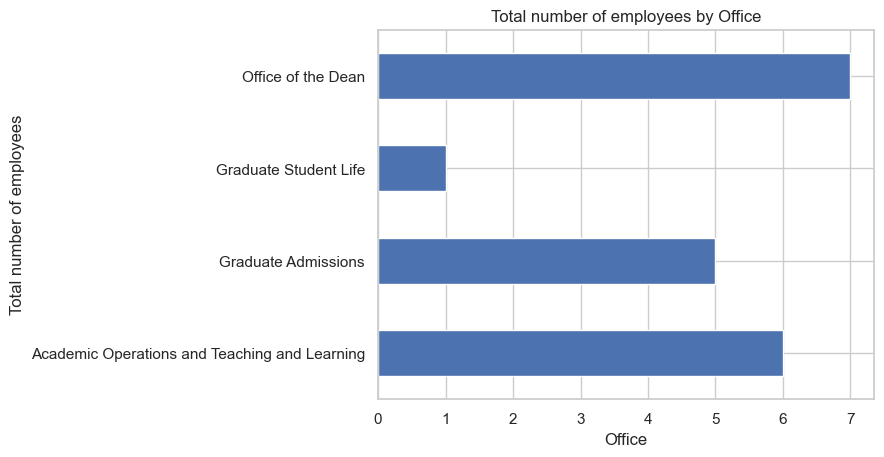

In [92]:
# Plot the data
fig, ax = plt.subplots()
staff_info.groupby(['office']).count()['name'].plot(kind='barh', stacked=True, ax=ax)
plt.xlabel('Office')
plt.ylabel('Total number of employees')
plt.title('Total number of employees by Office')
plt.show();

We can see the number of employees distribution per department or offices. 

# Part 3 : Working with Web API's

To work with the newsdata.io API and convert the JSON data into a Pandas DataFrame for analysis, we need to follow these steps:
- Sign up for an API key on the news data.io website.

- Choose the API , where I have chosen Live Breaking News.

- Use the API to retrieve JSON data.

- Parse the JSON data.

- Convert the data into a Pandas DataFrame.

- Then will perform some basic analysis on the data.

## Step 1: Sign Up for an API Key

I have visited the [newsdata](https://newsdata.io/) website and sign up for an API key, by following documentation and guidelines.

I sign up with my email and then verify that email and log in with my password. Then I searched the data to choose.

## Step 2: Choose an API
I have selected the 'Live Breaking News' API. The source of data is [source link]("https://newsdata.io/api/1/news?apikey=pub_3243760fb6d22af18df2cd88f599ffca0ebfd&q=Live%20Breaking%20News")

## Step 3: Retrieve JSON Data
Use Python to make an API request and retrieve JSON data. You can use the requests library to make HTTP requests.


In [30]:
# Import requests library to import data from the web
import requests

In [31]:
# Define my API key
api_key = 'pub_3243760fb6d22af18df2cd88f599ffca0ebfd'


In [32]:
# Define the API URL
topic = 'Live Breaking News'
api_url = f'https://newsdata.io/api/1/news?apikey={api_key}&q={topic}'
api_url

'https://newsdata.io/api/1/news?apikey=pub_3243760fb6d22af18df2cd88f599ffca0ebfd&q=Live Breaking News'

In [33]:
# Make the API request with my set key
response = requests.get(api_url)
# if response code result is 200 then we will get data sucessfully
response.status_code

200

Yes, it meets the condition to fetch data successfully from the web.

In [34]:
# Check the response status code
if response.status_code == 200:
    data = response.json()
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    data = []


## Step 4: Parse JSON Data and Create DataFrame
Assuming that you have received JSON data, you can parse it and create a Pandas DataFrame.


In [35]:
# create an emmpty list as data
data = news = data['results']

In [36]:
# Assuming the JSON data is a list of dictionaries
df = pd.DataFrame(news)
df.head()


,article_id,title,link,keywords,creator,video_url,description,content,pubDate,image_url,source_id,source_priority,country,category,language
0,41cd2f78b845a89e687f6955a68f54eb,Olivia Attwood breaks her silence on rumours o...,https://www.dailymail.co.uk/tvshowbiz/article-...,None,None,None,Olivia Attwood has broken her silence on rumou...,Olivia Attwood breaks her silence on rumours o...,2023-11-12 18:57:34,https://i.dailymail.co.uk/1s/2023/11/12/18/777...,dailymailuk,135,[united kingdom],[entertainment],english
1,b2dcdd4ce61ea746cfeec7b19790248c,Premier League fans hail 'guaranteed entertain...,https://www.dailystar.co.uk/sport/football/pre...,[Sport],None,None,Premier League fans have joked that it's guara...,"The term ""Barclays"" has long-since risen above...",2023-11-12 18:34:03,https://i2-prod.dailystar.co.uk/incoming/artic...,dailystar,3076,[united kingdom],[sports],english
2,7e88dba2847f110d8285b743fb485044,Micah Richards and Daniel Sturridge burst into...,https://www.dailystar.co.uk/sport/football/mic...,[Football],None,None,Sky Sports duo Micah Richards and Daniel Sturr...,Sky Sports pair and have been called 'box offi...,2023-11-12 18:06:30,https://i2-prod.dailystar.co.uk/incoming/artic...,dailystar,3076,[united kingdom],[top],english
3,406113a9bf227dc346e6fa3de9febdcc,ITV Big Brother’s Trish issues an apology afte...,https://www.manchestereveningnews.co.uk/news/t...,[TV],"[newsdesk@men-news.co.uk (Amelia Ward, Liv Cla...",None,Trish was evicted alongside Chanelle on Friday...,ITV Big Brother’s Trish has issued an apology ...,2023-11-12 17:31:10,https://i2-prod.manchestereveningnews.co.uk/in...,manchestereveningnews,6158,[united kingdom],[top],english
4,d721a5a4d01abb43a3a7db599d8ef3e8,​Benjamin Netanyahu tells NBC 'there could be'...,https://economictimes.indiatimes.com/news/inte...,None,None,None,"​""We heard that there was an impending deal of...","Synopsis ​""We heard that there was an impendin...",2023-11-12 17:25:26,None,economictimes_indiatimes,376,[india],[top],english


## Step 5: Basic Data Analysis
We will perform some basic analysis on the data using Pandas. For example:

Check the structure of the data using df.head() and df.info().


In [37]:
# See the first 5 rows of the data structure
df.head()

,article_id,title,link,keywords,creator,video_url,description,content,pubDate,image_url,source_id,source_priority,country,category,language
0,41cd2f78b845a89e687f6955a68f54eb,Olivia Attwood breaks her silence on rumours o...,https://www.dailymail.co.uk/tvshowbiz/article-...,None,None,None,Olivia Attwood has broken her silence on rumou...,Olivia Attwood breaks her silence on rumours o...,2023-11-12 18:57:34,https://i.dailymail.co.uk/1s/2023/11/12/18/777...,dailymailuk,135,[united kingdom],[entertainment],english
1,b2dcdd4ce61ea746cfeec7b19790248c,Premier League fans hail 'guaranteed entertain...,https://www.dailystar.co.uk/sport/football/pre...,[Sport],None,None,Premier League fans have joked that it's guara...,"The term ""Barclays"" has long-since risen above...",2023-11-12 18:34:03,https://i2-prod.dailystar.co.uk/incoming/artic...,dailystar,3076,[united kingdom],[sports],english
2,7e88dba2847f110d8285b743fb485044,Micah Richards and Daniel Sturridge burst into...,https://www.dailystar.co.uk/sport/football/mic...,[Football],None,None,Sky Sports duo Micah Richards and Daniel Sturr...,Sky Sports pair and have been called 'box offi...,2023-11-12 18:06:30,https://i2-prod.dailystar.co.uk/incoming/artic...,dailystar,3076,[united kingdom],[top],english
3,406113a9bf227dc346e6fa3de9febdcc,ITV Big Brother’s Trish issues an apology afte...,https://www.manchestereveningnews.co.uk/news/t...,[TV],"[newsdesk@men-news.co.uk (Amelia Ward, Liv Cla...",None,Trish was evicted alongside Chanelle on Friday...,ITV Big Brother’s Trish has issued an apology ...,2023-11-12 17:31:10,https://i2-prod.manchestereveningnews.co.uk/in...,manchestereveningnews,6158,[united kingdom],[top],english
4,d721a5a4d01abb43a3a7db599d8ef3e8,​Benjamin Netanyahu tells NBC 'there could be'...,https://economictimes.indiatimes.com/news/inte...,None,None,None,"​""We heard that there was an impending deal of...","Synopsis ​""We heard that there was an impendin...",2023-11-12 17:25:26,None,economictimes_indiatimes,376,[india],[top],english


In [38]:
# Check the dataset information in details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       10 non-null     object
 1   title            10 non-null     object
 2   link             10 non-null     object
 3   keywords         5 non-null      object
 4   creator          2 non-null      object
 5   video_url        0 non-null      object
 6   description      10 non-null     object
 7   content          10 non-null     object
 8   pubDate          10 non-null     object
 9   image_url        9 non-null      object
 10  source_id        10 non-null     object
 11  source_priority  10 non-null     int64 
 12  country          10 non-null     object
 13  category         10 non-null     object
 14  language         10 non-null     object
dtypes: int64(1), object(14)
memory usage: 1.3+ KB


From dataframe information we have found 15 columns, 10 rows, 4 columns has null values, only on integer variable and others are object although its not reality.

In [39]:
# See the data types of each variable
df.dtypes

article_id         object
title              object
link               object
keywords           object
creator            object
video_url          object
description        object
content            object
pubDate            object
image_url          object
source_id          object
source_priority     int64
country            object
category           object
language           object
dtype: object

In [41]:
# see the columns of the dataframe
df.columns

Index(['article_id', 'title', 'link', 'keywords', 'creator', 'video_url',
       'description', 'content', 'pubDate', 'image_url', 'source_id',
       'source_priority', 'country', 'category', 'language'],
      dtype='object')

As we have many columns and some of them are not relevant for our analysis. I will ignore those columns and make a new dataframe with other variable which will be good for our analysis. 

In [48]:
# Select the columns in a list which we will use 
selected_columns = ['title', 'creator', 'pubDate', 'source_id',
       'source_priority', 'country', 'category', 'language']

# Create a new dataframe name cleaned dataframe with thos new varibales selected
cleaned_df = df[selected_columns]

# Show the first five rows of newly created dataframe
cleaned_df.head()

,title,creator,pubDate,source_id,source_priority,country,category,language
0,Olivia Attwood breaks her silence on rumours o...,None,2023-11-12 18:57:34,dailymailuk,135,[united kingdom],[entertainment],english
1,Premier League fans hail 'guaranteed entertain...,None,2023-11-12 18:34:03,dailystar,3076,[united kingdom],[sports],english
2,Micah Richards and Daniel Sturridge burst into...,None,2023-11-12 18:06:30,dailystar,3076,[united kingdom],[top],english
3,ITV Big Brother’s Trish issues an apology afte...,"[newsdesk@men-news.co.uk (Amelia Ward, Liv Cla...",2023-11-12 17:31:10,manchestereveningnews,6158,[united kingdom],[top],english
4,​Benjamin Netanyahu tells NBC 'there could be'...,None,2023-11-12 17:25:26,economictimes_indiatimes,376,[india],[top],english


In [67]:
# import libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Use the filterwarnings function to ignore warnings
warnings.filterwarnings("ignore")

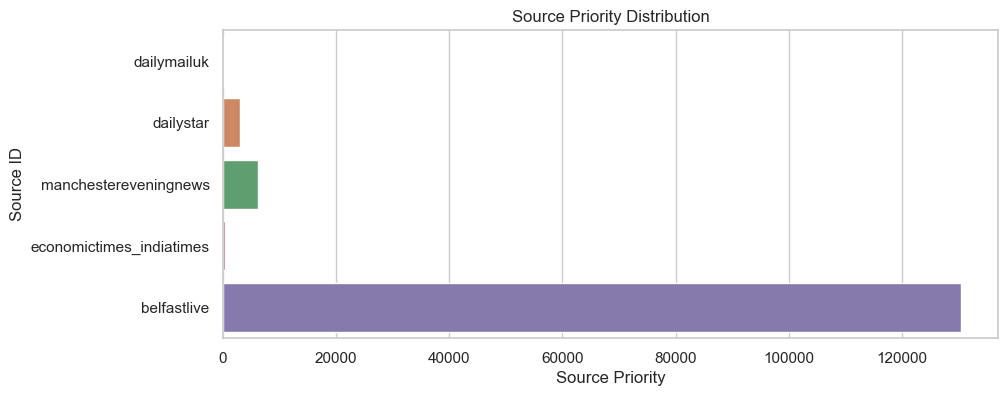

In [76]:
# Create a bar chart for source priority distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.barplot(x="source_priority", y="source_id", data=cleaned_df)
plt.title("Source Priority Distribution")
plt.xlabel("Source Priority")
plt.ylabel("Source ID")
plt.show();


Belfast live is the highest number of source_priority. Its very high compare to others source_ID.

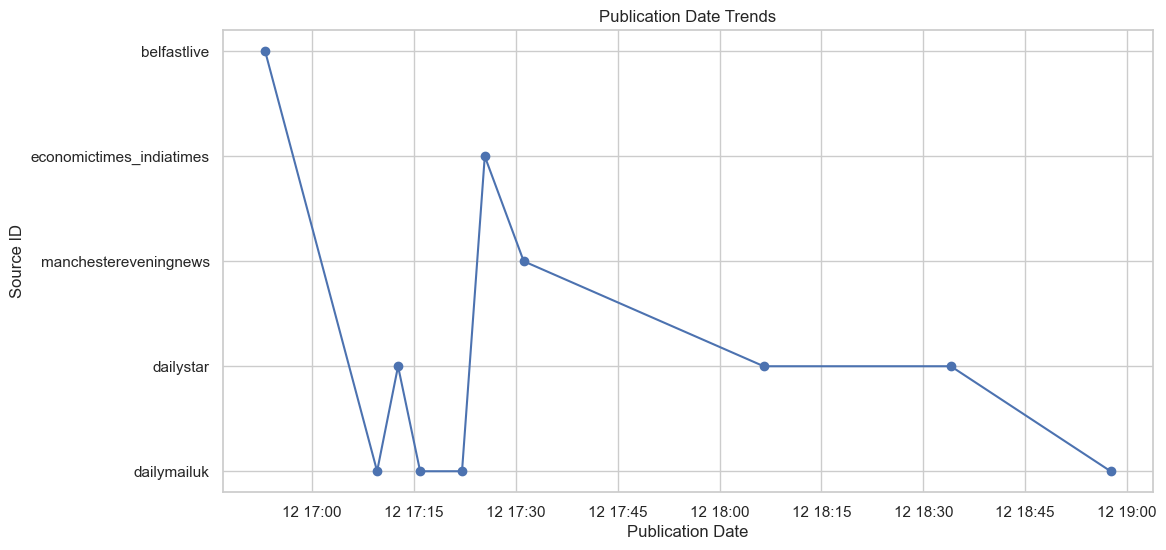

In [69]:
# Create a Time series line chart for publication date

# Convert the data type 
cleaned_df['pubDate'] = pd.to_datetime(cleaned_df['pubDate'])

plt.figure(figsize=(12, 6))
plt.plot(cleaned_df['pubDate'], cleaned_df['source_id'], marker='o')
plt.title("Publication Date Trends")
plt.xlabel("Publication Date")
plt.ylabel("Source ID")
plt.show();


Most published in before 17.00. After 17.00 gradually decrease the number of news publish. 

In [71]:
# Convert lists to strings and remove square brackets
cleaned_df['country'] = cleaned_df['country'].astype(str).str.strip('[]')

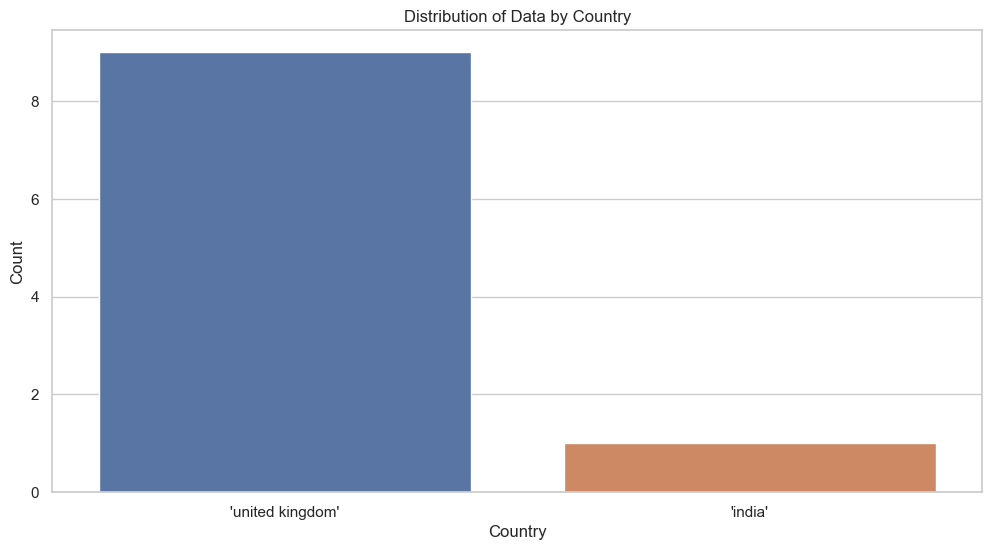

In [72]:
# Show a Countplot for countries distribution
plt.figure(figsize=(12, 6))
sns.countplot(x="country", data=cleaned_df)
plt.title("Distribution of Data by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show();


Among the countries United Kingdom was the highest news count in a certain period of time than other country like India.

In [73]:
# Convert lists to strings and remove square brackets
cleaned_df['category'] = cleaned_df['category'].astype(str).str.strip('[]')

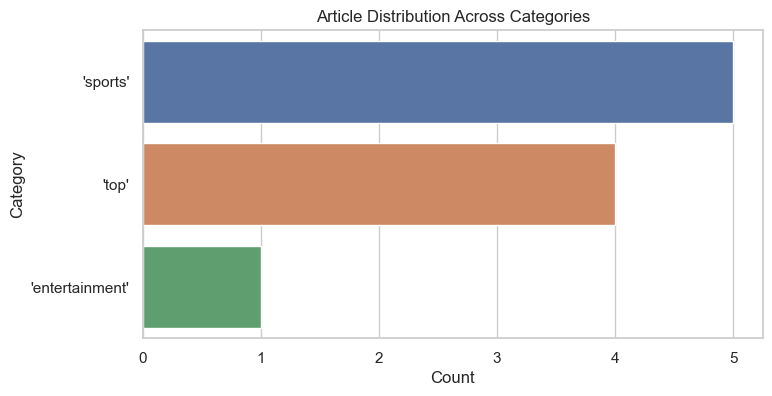

In [74]:
# Horizontal bar chart for categories
plt.figure(figsize=(8, 4))
sns.countplot(y="category", data=cleaned_df, order=cleaned_df['category'].value_counts().index)
plt.title("Article Distribution Across Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show();


Based on categories, Sports cover most of the news than entertainment.

# Summary: 
This is one more great project assigned by Professor James Topor. Its challenging but interesting to learn new skills in my career. It was fun to learn text data analysis, extraction from web through API, python beautiful soup library, request library. During this project I faced difficulties in text extraction, regex specially for data cleaning. 
I am so grateful to my professor to give that opportunity to develop my skills though this task. 
I enjoyed and expect more from him in future more project. 
In web api part news dataset, i have shown some visualization which make sens to the audience about the news spread area like sports, entertainment, language, country, category. From that basic analysis we have found some insights visually. 

